In [5]:
# Spam classifier project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
file_path = r"C:\Users\ChanakyaY\Downloads\Spam.csv"
df = pd.read_csv(file_path,encoding='iso-8859-1')
df = df.iloc[:,:-3]

In [7]:
df # ham --> no spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.columns = ['label', 'text']  # add columns name

In [13]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [15]:
df.shape

(5572, 2)

In [17]:
for i in range(50):
    print(df.iloc[i,-1])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more?

In [19]:
# DATA CLEANING
import re # regular expression
import nltk #natuaral language tool kit
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords # all basic words like is, or ,the
from nltk.stem.snowball import SnowballStemmer #Stemming is the process of reducing 
#words to their base or root form (e.g., "running" → "run").

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChanakyaY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ChanakyaY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
sn = SnowballStemmer("english") ## Initialize stemmer for English
stop = set(stopwords.words())

In [21]:
stop

{'除了',
 'except',
 'may',
 'tiver',
 'nikomer',
 'manche',
 'amíg',
 'dvestotim',
 '过',
 'também',
 'durante',
 'fossero',
 'dalt',
 'אך',
 'deseto',
 'komerkoli',
 'morali',
 'amb',
 'भन्छन्',
 'nada',
 'এস',
 'masihkah',
 'haatik',
 'pada',
 '尽管',
 'dvoj',
 'esa',
 'noilta',
 'лучше',
 'dată',
 'thru',
 'vsaka',
 '应该',
 "that'll",
 'diakhiri',
 'هم',
 'নতুন',
 '以后',
 'kolikšne',
 'njuni',
 'এখনও',
 'enajste',
 '今年',
 'tentu',
 'sedemnajsto',
 'njena',
 'εἴμι',
 'triintridesetem',
 'door',
 'voastră',
 'había',
 'бо вуҷуди он ки',
 'veya',
 'لمّا',
 'phla',
 'osemnajsti',
 'torej',
 'هَيْهات',
 '俺们',
 'mellom',
 'oba',
 'njeno',
 'nikakršnima',
 'ind',
 'tämän',
 'यी',
 'només',
 'mujhe',
 'tened',
 'jumlah',
 'estuviesen',
 'downwards',
 'भित्री',
 'auraient',
 'ἅμα',
 'triindvajseta',
 'μη',
 'kvifor',
 'istifadə',
 'iss',
 'takšen',
 'masa',
 'пфша',
 'הרי',
 '哪儿',
 'أطعم',
 'оҳе',
 'rhe',
 'αυτων',
 'أخبر',
 'sedang',
 'ὦ',
 'هي',
 'me',
 'moji',
 '自己',
 'prvimi',
 'нее',
 'οὗτος'

In [22]:
def clean_text(sms):
    sms = sms.lower() #converts all charcters to lower case
    sms = re.sub("[^a-z0-9]"," ",sms) # if the charcter is not in bw a-z or 0-9 then replace with by space
    sms = nltk.word_tokenize(sms) # nltk.download('punkt_tab') #punkt is a pre-trained tokenizer model 
    #used by nltk.tokenize.
    sms = [t for t in sms if len(t)>1]
    sms = [word for word in sms if word not in stop]
    sms = [sn.stem(word) for word in sms if word not in stop]
    sms = ' '.join(sms)
    
    return sms
    

In [23]:
clean_text("Get Unlimited !!!.... ? free Data 100GB at 0 Rs playing played")

'unlimit free data 100gb rs play play'

In [24]:
df['clean_text'] = df['text'].apply(clean_text) # adding new column with good/clean text

In [25]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazi avail bugi great world buff...
1,ham,Ok lar... Joking wif u oni...,lar joke wif
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win cup final tkts 21st 2...
3,ham,U dun say so early hor... U c already then say...,dun earli
4,ham,"Nah I don't think he goes to usf, he lives aro...",usf live


## WORD CLOUD

In [27]:
from wordcloud import WordCloud

In [28]:
hamdata = df[df['label'] == 'ham']
spamdata = df[df['label'] == 'spam']
hamdata = hamdata['clean_text']
spamdata = spamdata['clean_text']

In [29]:
hamdata

0       jurong point crazi avail bugi great world buff...
1                                            lar joke wif
3                                               dun earli
4                                                usf live
6                          brother speak treat aid patent
                              ...                        
5565                                                     
5568                                     esplanad fr home
5569                                    piti mood suggest
5570            guy bitch act interest buy week gave free
5571                                                 rofl
Name: clean_text, Length: 4825, dtype: object

In [30]:
# ' '.join(hamdata)

In [31]:
def wordCloud(data):
    words = ' '.join(data)
    wc = WordCloud()
    wc = wc.generate(words)

    plt.imshow(wc)
    

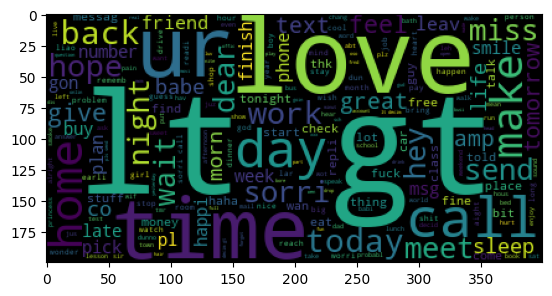

In [37]:
wordCloud(hamdata)

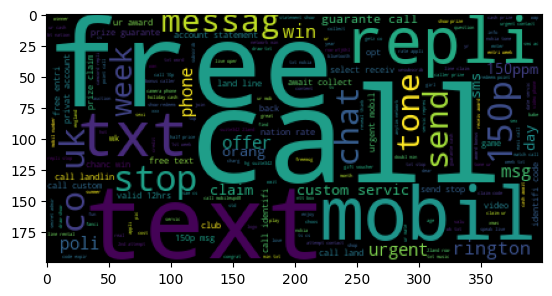

In [38]:
wordCloud(spamdata)

## Featurization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer()#a vector is a numerical representation of text.
# convert text data into numerical vectors by counting word occurrences in a given dataset.

In [50]:
X =cv.fit_transform(df['clean_text']).toarray()

In [52]:
X.shape

(5572, 6796)

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
y = pd.get_dummies(df['label']) #converts categorical data into a numerical format
y = y['spam'].values

In [61]:
y


array([False, False,  True, ..., False, False, False])

## Model Building

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size =0.33,random_state = 0)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
model = MultinomialNB()

In [72]:
model.fit(X_train,y_train)

MultinomialNB()

In [74]:
y_pred = model.predict(X_test)

In [76]:
pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})

,Actual,Predicted
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1834,False,False
1835,False,False
1836,False,False
1837,False,False


In [78]:
print("accuracy on training data:")
print(model.score(X_train , y_train))

accuracy on training data:
0.98928475756764


In [82]:
print("accuracy on testing data:")
print(model.score(X_test , y_test))

accuracy on testing data:
0.9831430125067971


In [84]:
from sklearn.metrics import confusion_matrix , f1_score ,classification_report

In [86]:
confusion_matrix(y_test , y_pred)

array([[1558,   20],
       [  11,  250]], dtype=int64)

In [88]:
# out of 1225 + 11 non spam emails , 11 emails were error , similarly for 20 and 250

In [90]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1578
        True       0.93      0.96      0.94       261

    accuracy                           0.98      1839
   macro avg       0.96      0.97      0.97      1839
weighted avg       0.98      0.98      0.98      1839



In [92]:
f1_score(y_test , y_pred)

0.9416195856873822